In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', None)
import numpy as np
from collections import Counter
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
import string
from scipy.stats import mannwhitneyu

In [2]:
df = pd.read_csv('../data/ht_class/ht_cleaned_paper_df.csv')
# Replace True/False to Yes/No
# Snippet: https://stackoverflow.com/a/45196807
bool_cols = df.columns[df.dtypes == 'bool']
df[bool_cols] = df[bool_cols].replace({True: 'Yes', False: 'No'})
df['PaperType'] = df['PaperType'].replace({'J': 'Jor.', 'C': 'Con.'})

# cutoff
cutoff_year = 2020
df = df[df['Year'] <= cutoff_year]

In [3]:
df.head()

,Conference,Year,Title,DOI,FirstPage,LastPage,PaperType,OpenAlex Year,OpenAlex Publication Date,OpenAlex ID,OpenAlex Venue Name,OpenAlex First Page,OpenAlex Last Page,Number of Pages,Number of References,Number of Concepts,Number of Citations,Number of Authors,Cross-type Collaboration,Cross-country Collaboration,With US Authors,Both Cross-type and Cross-country Collaboration,IEEE Title,Citation Counts on Google Scholar,Award,Award Name,Award Track
0,InfoVis,2011,D³ Data-Driven Documents,10.1109/TVCG.2011.185,2301.0,2309,Jor.,2011,2011-12-01,W2135415614,IEEE Transactions on Visualization and Compute...,2301.0,2309.0,9.0,27,9,2185,3.0,No,No,Yes,No,D³ Data-Driven Documents,3647.0,No,NaN,NaN
1,Vis,1991,Tree-maps: a space-filling approach to the vis...,10.1109/VISUAL.1991.175815,284.0,291,Con.,1991,1991-10-22,W2146872957,ieee visualization,284.0,291.0,8.0,21,17,1118,2.0,No,No,Yes,No,Tree-maps: a space-filling approach to the vis...,2191.0,No,NaN,NaN
2,Vis,1990,Parallel coordinates: a tool for visualizing m...,10.1109/VISUAL.1990.146402,361.0,378,Con.,1990,1990-10-23,W2034694694,ieee visualization,361.0,378.0,18.0,20,10,993,2.0,No,No,Yes,No,Parallel coordinates: a tool for visualizing m...,1688.0,No,NaN,NaN
3,InfoVis,2006,Hierarchical Edge Bundles: Visualization of Ad...,10.1109/TVCG.2006.147,741.0,748,Jor.,2006,2006-09-01,W2145640629,IEEE Transactions on Visualization and Compute...,741.0,748.0,8.0,32,13,795,1.0,No,No,No,No,Hierarchical Edge Bundles: Visualization of Ad...,1349.0,Yes,BP,InfoVis
4,Vis,1997,ROAMing terrain: Real-time Optimally Adapting ...,10.1109/VISUAL.1997.663860,81.0,88,Con.,1997,1997-10-01,W2532506824,ieee visualization,81.0,88.0,8.0,20,10,586,6.0,No,No,Yes,No,ROAMing terrain: Real-time Optimally Adapting ...,1398.0,No,NaN,NaN


In [4]:
citenum = 'Number of Citations'
gcitenum = 'Citation Counts on Google Scholar'

In [5]:
df[df['Award'].isin(['No', 'Con.'])].head()

,Conference,Year,Title,DOI,FirstPage,LastPage,PaperType,OpenAlex Year,OpenAlex Publication Date,OpenAlex ID,OpenAlex Venue Name,OpenAlex First Page,OpenAlex Last Page,Number of Pages,Number of References,Number of Concepts,Number of Citations,Number of Authors,Cross-type Collaboration,Cross-country Collaboration,With US Authors,Both Cross-type and Cross-country Collaboration,IEEE Title,Citation Counts on Google Scholar,Award,Award Name,Award Track
0,InfoVis,2011,D³ Data-Driven Documents,10.1109/TVCG.2011.185,2301.0,2309,Jor.,2011,2011-12-01,W2135415614,IEEE Transactions on Visualization and Compute...,2301.0,2309.0,9.0,27,9,2185,3.0,No,No,Yes,No,D³ Data-Driven Documents,3647.0,No,NaN,NaN
1,Vis,1991,Tree-maps: a space-filling approach to the vis...,10.1109/VISUAL.1991.175815,284.0,291,Con.,1991,1991-10-22,W2146872957,ieee visualization,284.0,291.0,8.0,21,17,1118,2.0,No,No,Yes,No,Tree-maps: a space-filling approach to the vis...,2191.0,No,NaN,NaN
2,Vis,1990,Parallel coordinates: a tool for visualizing m...,10.1109/VISUAL.1990.146402,361.0,378,Con.,1990,1990-10-23,W2034694694,ieee visualization,361.0,378.0,18.0,20,10,993,2.0,No,No,Yes,No,Parallel coordinates: a tool for visualizing m...,1688.0,No,NaN,NaN
4,Vis,1997,ROAMing terrain: Real-time Optimally Adapting ...,10.1109/VISUAL.1997.663860,81.0,88,Con.,1997,1997-10-01,W2532506824,ieee visualization,81.0,88.0,8.0,20,10,586,6.0,No,No,Yes,No,ROAMing terrain: Real-time Optimally Adapting ...,1398.0,No,NaN,NaN
5,Vis,2003,Acceleration techniques for GPU-based volume r...,10.1109/VISUAL.2003.1250384,287.0,292,Con.,2003,2003-10-22,W2113001609,ieee visualization,38.0,38.0,1.0,17,20,608,2.0,No,No,No,No,Acceleration techniques for GPU-based volume r...,1279.0,No,NaN,NaN


## Plot boxplots with stripplots

In [6]:
vars = ['Cross-type Collaboration', 'Cross-country Collaboration',
       'With US Authors', 'Award', 'PaperType']
short_varname_dic = {
    'Cross-type Collaboration':'Cross-type',
    'Cross-country Collaboration':'Cross-country',
    'With US Authors':'W/ US Authors'
}

In [7]:
'Cross-type Collaboration' in short_varname_dic.keys()

True

In [8]:
# f, axs = plt.subplots(5,1,
#                       figsize=(9,10),
#                       sharex=True,
#                       sharey=False,
#                       gridspec_kw=dict(height_ratios=[1,1,1,1,1]))
# for var in vars:
#     index = vars.index(var)
#     g = sns.boxplot(x=df[citenum], y=df[var].astype(str), palette="Set2", ax=axs[index])
#     g = sns.stripplot(x=df[citenum], y=df[var].astype(str), 
#               size=2, color="orange", linewidth=0, ax=axs[index], alpha=0.2)
#     if index != -1:
#         g.set_xlabel("")
#         g.set_xscale("log")
#     else:
#         g.set_xscale("log")
#     if var in short_varname_dic.keys():
#         g.set_ylabel(short_varname_dic[var])
#     else:
#         g.set_ylabel("Cross-Type")

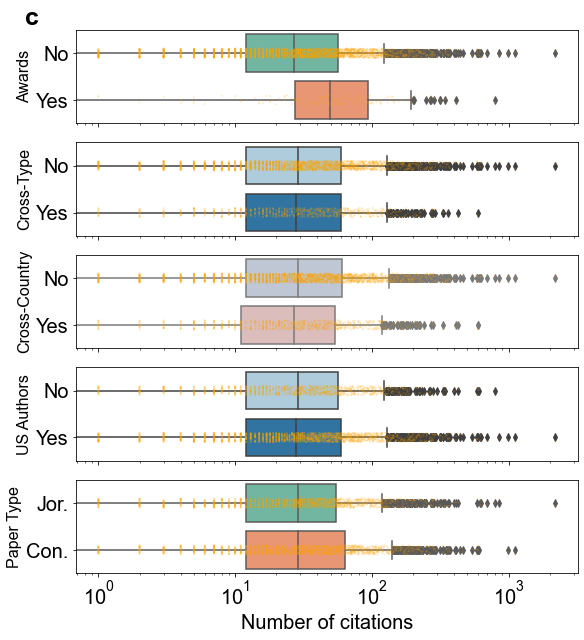

In [42]:
f, axs = plt.subplots(5,1,
                      figsize=(9,10),
                      sharex=True,
                      sharey=False,
                      gridspec_kw=dict(height_ratios=[1,1,1,1,1]))
g0 = sns.boxplot(x=df[citenum], y=df['Award'].astype(str), palette="Set2", ax=axs[0])
g0 = sns.stripplot(x=df[citenum], y=df['Award'].astype(str), 
              size=2, color="orange", linewidth=0, ax=axs[0], alpha=0.2)
g0.set_xlabel("")
g0.set_ylabel("Awards", fontsize=16)
###########
g1 = sns.boxplot(x=df[citenum], 
                 y=df['Cross-type Collaboration'].astype(str), palette="Paired", ax=axs[1])
g1 = sns.stripplot(x=df[citenum], y=df['Cross-type Collaboration'].astype(str), 
              size=2, color="orange", linewidth=0, ax=axs[1], alpha=0.2)
g1.set_xlabel("")
g1.set_ylabel("Cross-Type", fontsize=16)
#############
g2 = sns.boxplot(x=df[citenum], 
                 y=df['Cross-country Collaboration'].astype(str), palette="vlag", ax=axs[2])
g2 = sns.stripplot(x=df[citenum], y=df['Cross-country Collaboration'].astype(str),
                   size=2, color="orange", linewidth=0, ax=axs[2], alpha=.2)
g2.set_xlabel("")
g2.set_ylabel("Cross-Country", fontsize=16)
################
g3 = sns.boxplot(x=df[citenum], 
                 y=df['With US Authors'].astype(str), 
                 palette="Paired", 
                 ax=axs[3],
                 order = ['No', 'Yes'],  
                )
g3 = sns.stripplot(x=df[citenum], y=df['With US Authors'].astype(str), 
                   order = ['No', 'Yes'], 
              size=2, color="orange", linewidth=0, ax=axs[3], alpha=0.2)
g3.set_xlabel("")
g3.set_ylabel("US Authors", fontsize=16)
##################
g4 = sns.boxplot(x=citenum, y='PaperType', data=df, palette="Set2", ax=axs[4])
g4 = sns.stripplot(x=citenum, y='PaperType', data=df,
              size=2, color="orange", linewidth=0, ax=axs[4], alpha=0.2)
g4.set_xlabel('Number of citations')
g4.set_xscale("log")
g4.set_ylabel("Paper Type", fontsize=16)
f.text(-0.1, 1.05, 'c', transform=g0.transAxes, 
            size=25, weight='bold')
# f.tight_layout()
f.savefig('../results/figures/boxplots.pdf', dpi=150)
f.savefig('../results/figures/boxplots.png', dpi=150)

## Citation distributions

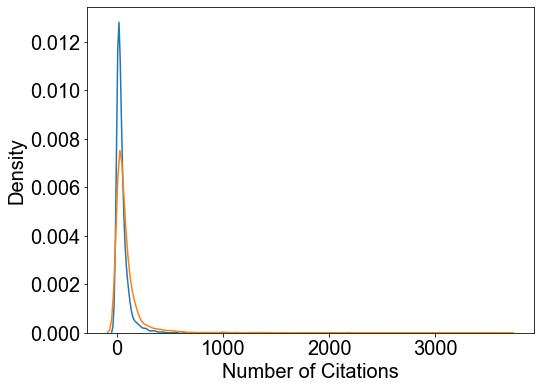

In [10]:
ax = sns.kdeplot(df[citenum], label='OpenAlex')
g = sns.kdeplot(df[gcitenum], ax=ax, label='Google Scholar')

Text(0.5, 0, 'Author percentile by citations in descending order')

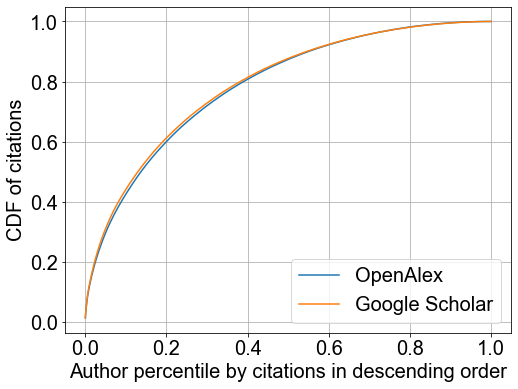

In [11]:
cits = df[citenum].sort_values(ascending=False).tolist()
dff = pd.DataFrame(cits, columns = ['citations'])
dff['pdf'] = dff['citations'] / sum(dff['citations'])
dff['cdf'] = dff['pdf'].cumsum()
dff['ccdf'] = 1 - dff['cdf']
dff = dff.reset_index()
dff['rank'] = (dff['index'] + 1)/dff.shape[0]
ax = dff.plot(x = 'rank', y = 'cdf', grid=True, label='OpenAlex')
ax.set_xlabel('Author percentile by citations in descending order')
ax.set_ylabel('CDF of citations')
#####
cits = df[gcitenum].dropna().sort_values(ascending=False).tolist()
dff = pd.DataFrame(cits, columns = ['citations'])
dff['pdf'] = dff['citations'] / sum(dff['citations'])
dff['cdf'] = dff['pdf'].cumsum()
dff['ccdf'] = 1 - dff['cdf']
dff = dff.reset_index()
dff['rank'] = (dff['index'] + 1)/dff.shape[0]
g = dff.plot(x = 'rank', y = 'cdf', grid=True, ax = ax, label='Google Scholar')
g.set_xlabel('Author percentile by citations in descending order')

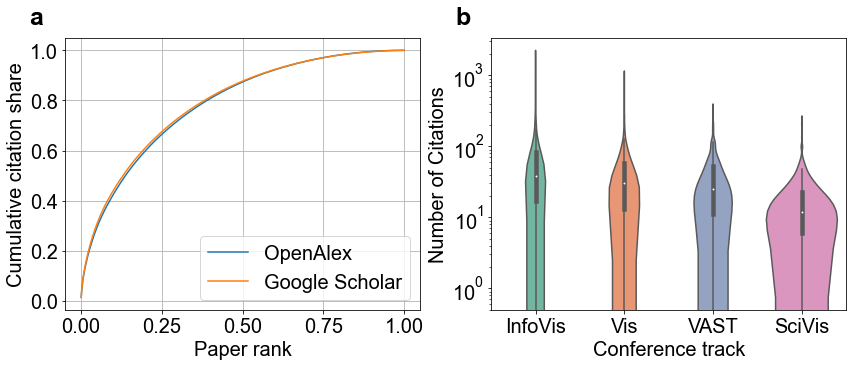

In [40]:
f, axs = plt.subplots(1,2,
                      figsize=(14,5),
                      sharex=False,
                      sharey=False,)

##### Percentile
## OpenAlex
cits = df[citenum].sort_values(ascending=False).tolist()
dff = pd.DataFrame(cits, columns = ['citations'])
dff['pdf'] = dff['citations'] / sum(dff['citations'])
dff['cdf'] = dff['pdf'].cumsum()
dff['ccdf'] = 1 - dff['cdf']
dff = dff.reset_index()
dff['rank'] = (dff['index'] + 1)/dff.shape[0]
g2 = dff.plot(x = 'rank', y = 'cdf', grid=True, label='OpenAlex', ax=axs[0])
# g2.set_xlabel('Paper percentile by citations (from high to low)')
g2.set_ylabel('Cumulative citation share')

### Google Scholar
cits = df[gcitenum].dropna().sort_values(ascending=False).tolist()
dff = pd.DataFrame(cits, columns = ['citations'])
dff['pdf'] = dff['citations'] / sum(dff['citations'])
dff['cdf'] = dff['pdf'].cumsum()
dff['ccdf'] = 1 - dff['cdf']
dff = dff.reset_index()
dff['rank'] = (dff['index'] + 1)/dff.shape[0]
g2_2 = dff.plot(x = 'rank', y = 'cdf', grid=True, ax = g2, label='Google Scholar')
g2_2.set_xlabel('Paper rank')
g2_2.text(-0.1, 1.05, 'a', transform=g2_2.transAxes, 
            size=25, weight='bold')

###### Conference tracks
g3 = sns.violinplot(x='Conference', y=citenum, data = df, palette="Set2", ax=axs[1])
g3.set_yscale("log")
g3.set_xlabel('Conference track')
g3.text(-0.1, 1.05, 'b', transform=g3.transAxes, 
            size=25, weight='bold')

##### Save fig
f.savefig('../results/figures/citation_distributions.png', dpi=150)
f.savefig('../results/figures/citation_distributions.pdf', dpi=150)

In [14]:
# f, axs = plt.subplots(2,2,
#                       figsize=(14,10),
#                       sharex=False,
#                       sharey=False,
#                       gridspec_kw=dict(height_ratios=[1,1]))
# ##### Corr plot
# g0 = sns.regplot(x=citenum, y=gcitenum, data = df,
#             line_kws={"color":"orange","alpha":0.3,"lw":2},
#             ax = axs[0,0])
# g0.set_xlabel('OpenAlex citations')
# g0.set_ylabel('Google Scholar citations')
# g0.text(-0.1, 1.1, 'A', transform=g0.transAxes, 
#             size=20, weight='bold')

# ##### Citation Distribution
# g1 = sns.kdeplot(df[citenum], ax=axs[0,1])
# g1_2 = sns.kdeplot(df[gcitenum], ax=g1)
# g1_2.text(-0.1, 1.1, 'B', transform=g1_2.transAxes, 
#             size=20, weight='bold')

# ##### Percentile
# ## OpenAlex
# cits = df[citenum].sort_values(ascending=False).tolist()
# dff = pd.DataFrame(cits, columns = ['citations'])
# dff['pdf'] = dff['citations'] / sum(dff['citations'])
# dff['cdf'] = dff['pdf'].cumsum()
# dff['ccdf'] = 1 - dff['cdf']
# dff = dff.reset_index()
# dff['rank'] = (dff['index'] + 1)/dff.shape[0]
# g2 = dff.plot(x = 'rank', y = 'cdf', grid=True, label='OpenAlex', ax=axs[1,0])
# g2.set_xlabel('Author percentile by citations in descending order')
# g2.set_ylabel('CDF of citations')

# ### Google Scholar
# cits = df[gcitenum].dropna().sort_values(ascending=False).tolist()
# dff = pd.DataFrame(cits, columns = ['citations'])
# dff['pdf'] = dff['citations'] / sum(dff['citations'])
# dff['cdf'] = dff['pdf'].cumsum()
# dff['ccdf'] = 1 - dff['cdf']
# dff = dff.reset_index()
# dff['rank'] = (dff['index'] + 1)/dff.shape[0]
# g2_2 = dff.plot(x = 'rank', y = 'cdf', grid=True, ax = g2, label='Google Scholar')
# g2_2.set_xlabel('Paper rank by citations (decsending) / total # of papers')
# g2_2.text(-0.1, 1.1, 'C', transform=g2_2.transAxes, 
#             size=20, weight='bold')

# ###### Conference tracks
# g3 = sns.violinplot(x='Conference', y=citenum, data = df, ax=axs[1,1])
# g3.set_yscale("log")
# g3.text(-0.1, 1.1, 'D', transform=g3.transAxes, 
#             size=20, weight='bold')

# ##### Save fig
# f.savefig('../results/figures/citation_distributions.png', dpi=150)

In [15]:
# fig, axs = plt.subplots(2,2,figsize=(8,8))
# axs = axs.flat
# for n, ax in enumerate(axs):

## Statistical analysis

In [27]:
df.corr(method = 'spearman').at[citenum, gcitenum]

0.9764685363748073

In [17]:
for var in vars:
    average = df.groupby(var)[citenum].mean()
    print(average)

Cross-type Collaboration
No     51.228645
Yes    46.020107
Name: Number of Citations, dtype: float64
Cross-country Collaboration
No     52.319725
Yes    42.511533
Name: Number of Citations, dtype: float64
With US Authors
No     46.718363
Yes    51.653254
Name: Number of Citations, dtype: float64
Award
No     48.544674
Yes    76.714286
Name: Number of Citations, dtype: float64
PaperType
Con.    51.693101
Jor.    48.184402
Name: Number of Citations, dtype: float64


In [18]:
for var in vars:
    cat1 = df[df[var].isin(['Yes', 'Jor.'])]
    cat2 = df[df[var].isin(['No', 'Con.'])]
    U, p = mannwhitneyu(cat1[citenum].tolist(), cat2[citenum].tolist())
    print(f'{var}')
    print(f'U: {U}')
    print(format(p, 'f'))
    print('─' * 30)

Cross-type Collaboration
U: 859846.5
0.820541
──────────────────────────────
Cross-country Collaboration
U: 816517.0
0.050195
──────────────────────────────
With US Authors
U: 1060021.0
0.924969
──────────────────────────────
Award
U: 292878.0
0.000000
──────────────────────────────
PaperType
U: 1149716.5
0.334718
──────────────────────────────


In [19]:
print('Google Scholar')
for var in vars:
    cat1 = df[df[var].isin(['Yes', 'Jor.'])]
    cat2 = df[df[var].isin(['No', 'Con.'])]
    U, p = mannwhitneyu(cat1[gcitenum].dropna().tolist(), cat2[gcitenum].dropna().tolist())
    print(f'{var}')
    print(f'U: {U}')
    print(format(p, 'f'))
    print('─' * 30)

Google Scholar
Cross-type Collaboration
U: 837303.5
0.199748
──────────────────────────────
Cross-country Collaboration
U: 786671.0
0.000757
──────────────────────────────
With US Authors
U: 1062700.0
0.816442
──────────────────────────────
Award
U: 287031.0
0.000000
──────────────────────────────
PaperType
U: 1049321.0
0.000000
──────────────────────────────


In [20]:
for var in vars:
    average = df.groupby(var)[citenum].mean()
    print(average)

Cross-type Collaboration
No     51.228645
Yes    46.020107
Name: Number of Citations, dtype: float64
Cross-country Collaboration
No     52.319725
Yes    42.511533
Name: Number of Citations, dtype: float64
With US Authors
No     46.718363
Yes    51.653254
Name: Number of Citations, dtype: float64
Award
No     48.544674
Yes    76.714286
Name: Number of Citations, dtype: float64
PaperType
Con.    51.693101
Jor.    48.184402
Name: Number of Citations, dtype: float64
